In [0]:
!pip install kaggle
!pip install numpy
#Machine learning
!pip install catboost
!pip install mpld3

     |████████████████████████████████| 798kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


In [0]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [0]:
#list competitions
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3053           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11200           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4724           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         38           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3259           False  
champs-scalar-coupling                             2019-08-28 23:59:00  Featured           $30,000      

In [0]:

#download earthquake data, will take 30-60 seconds
!kaggle competitions download -c LANL-Earthquake-Prediction

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

sample_data  sample_submission.csv  test.zip  train.csv  train.csv.zip


In [0]:
#unzip training data for usage, will take about 5 minutes (its big)
!ls
!unzip train.csv.zip
!ls

sample_data  sample_submission.csv  test.zip  train.csv  train.csv.zip
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
sample_data  sample_submission.csv  test.zip  train.csv  train.csv.zip


In [0]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train.csv', nrows=6000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [0]:
train.head()

acoustic_data  time_to_failure
0             12           1.4691
1              6           1.4691
2              8           1.4691
3              5           1.4691
4              8           1.4691

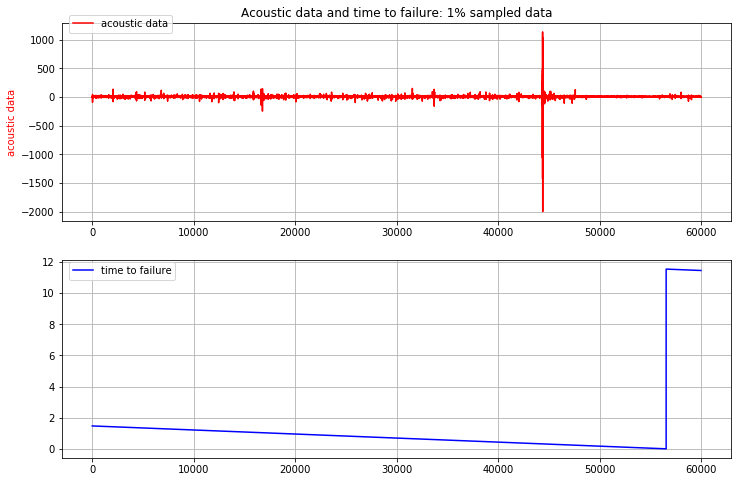

In [0]:
train_ad_sample_df = train['acoustic_data'].values[::100]
train_ttf_sample_df = train['time_to_failure'].values[::100]

import mpld3
mpld3.enable_notebook()
#plt.rcParams['figure.figsize'] = [9.5,6]

#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 1% sampled data"):
    fig = plt.figure(figsize=(12, 8))
    #fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1 = fig.add_subplot(2,1,1)
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    plt.grid(True)
    #ax2 = ax1.twinx()
    ax2 = fig.add_subplot(2,1,2, sharex=ax1)
    plt.subplot(2,1,2)
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

In [0]:
#Feature Engineering 
def gen_features(X):
    strain = []
    strain.append(X.mean())
    strain.append(X.std())
    strain.append(X.min())
    strain.append(X.max())
    strain.append(X.kurtosis())
    strain.append(X.skew())
    strain.append(np.quantile(X,0.01))
    strain.append(np.quantile(X,0.05))
    strain.append(np.quantile(X,0.95))
    strain.append(np.quantile(X,0.99))
    strain.append(np.abs(X).max())
    strain.append(np.abs(X).mean())
    strain.append(np.abs(X).std())
    return pd.Series(strain)

In [0]:

train = pd.read_csv('train.csv', iterator=True, chunksize=150_000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

X_train = pd.DataFrame()
y_train = pd.Series()
for df in train:
    ch = gen_features(df['acoustic_data'])
    X_train = X_train.append(ch, ignore_index=True)
    y_train = y_train.append(pd.Series(df['time_to_failure'].values[-1]))

In [0]:
X_train.describe()

0            1   ...           11           12
count  4195.000000  4195.000000  ...  4195.000000  4195.000000
mean      4.519475     6.547788  ...     5.547367     5.750165
std       0.256049     8.503939  ...     1.517038     8.339211
min       3.596313     2.802720  ...     4.147707     2.589085
25%       4.349497     4.478637  ...     5.061843     3.862810
50%       4.522147     5.618798  ...     5.380853     4.781513
75%       4.693350     6.880904  ...     5.748553     5.887947
max       5.391993   153.703569  ...    32.762073   150.432368

[8 rows x 13 columns]

     |████████████████████████████████| 61.1MB 1.3MB/s 
     |████████████████████████████████| 17.3MB 28.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.15.0
    Uninstalling numpy-1.15.0:
      Successfully uninstalled numpy-1.15.0


In [0]:
from catboost import CatBoostRegressor, Pool

ValueError: ignored

In [0]:
from catboost import CatBoostRegressor, Pool

AttributeError: ignored

In [0]:
train_pool = Pool(X_train, y_train)
m = CatBoostRegressor(iterations=10000, loss_function='MAE', boosting_type='Ordered')
m.fit(X_train, y_train, silent=True)
m.best_score_

NameError: ignored

In [0]:
y_train.describe()

count    4195.000000
mean        5.683670
std         3.673246
min         0.006398
25%         2.635348
50%         5.358796
75%         8.177500
max        16.103196
dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

In [0]:
test_pool = Pool(X_test, y_test)
y_train_pred = m.predict(X_train)
y_test_pred = m.predict(test_pool)
from sklearn.metrics import mean_absolute_error
MAE_CB_train = mean_absolute_error(y_train,y_train_pred)
MAE_CB_test = mean_absolute_error(y_test,y_test_pred)
display(MAE_CB_train)
display(MAE_CB_test)
plt.show()
plt.plot(y_test, y_test_pred, '.')
plt.show()
plt.plot(y_train, y_train_pred, '.')

NameError: ignored

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=20, max_depth=8,random_state=0, max_features='sqrt',min_samples_leaf=4,min_samples_split=3)
regr.fit(X_train, y_train)
y_test_pred=regr.predict(X_test)
y_train_pred = regr.predict(X_train)

NameError: ignored

1.813964649990632

2.1831092938466328

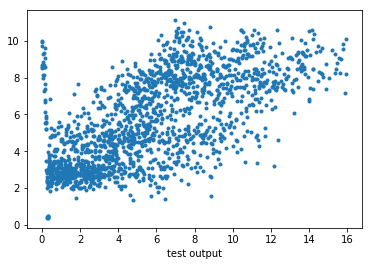

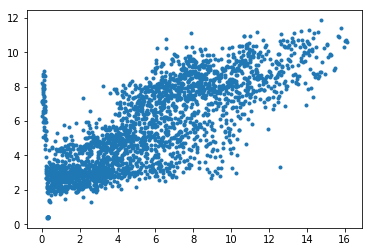

In [0]:
from sklearn.metrics import mean_absolute_error
MAE_RF_train = mean_absolute_error(y_train,y_train_pred)
MAE_RF_test = mean_absolute_error(y_test,y_test_pred)
display(MAE_RF_train)
display(MAE_RF_test)
plt.show()
plt.plot(y_test, y_test_pred, '.')
plt.xlabel('test output')
plt.show()
plt.plot(y_train, y_train_pred, '.')

In [0]:
#unzip training data for usage, will take about 5 minutes (its big)
!ls
!unzip test.zip
!ls

catboost_info  sample_submission.csv  train.csv
sample_data    test.zip		      train.csv.zip
Archive:  test.zip
  inflating: seg_430e66.csv          
  inflating: seg_d1a281.csv          
  inflating: seg_05a1b0.csv          
  inflating: seg_f8dd7e.csv          
  inflating: seg_b9bdd7.csv          
  inflating: seg_24c1c9.csv          
  inflating: seg_c5abaa.csv          
  inflating: seg_6262c4.csv          
  inflating: seg_734a88.csv          
  inflating: seg_94a133.csv          
  inflating: seg_d0c280.csv          
  inflating: seg_d36737.csv          
  inflating: seg_f80e44.csv          
  inflating: seg_07c815.csv          
  inflating: seg_7c9433.csv          
  inflating: seg_211486.csv          
  inflating: seg_78ded2.csv          
  inflating: seg_f11f77.csv          
  inflating: seg_b3883e.csv          
  inflating: seg_3db0a8.csv          
  inflating: seg_81f798.csv          
  inflating: seg_0a45a1.csv          
  inflating: seg_dc188b.csv          
  inflating: s

In [0]:
submission = pd.read_csv('sample_submission.csv', index_col='seg_id')

In [0]:
for col in submission.columns: 
    print(col) 

time_to_failure


In [0]:
#X_test_submit = pd.DataFrame(columns='time_to_failure', dtype=np.float64, index=submission.index)

((2624, 1), (2624, 13))

In [0]:
for seg_id in submission.index:
    seg = pd.read_csv( seg_id + '.csv')
    X_seg = pd.DataFrame()
    X_seg = X_seg.append(gen_features(seg), ignore_index=True)
    submission.loc[seg_id,'time_to_failure'] = regr.predict(X_seg)    

In [0]:
submission_cat = submission
# Cat boost regression submission vector
for seg_id in submission_cat.index:
    seg = pd.read_csv( seg_id + '.csv')
    X_seg = pd.DataFrame()
    X_seg = X_seg.append(gen_features(seg), ignore_index=True)
    submission_cat.loc[seg_id,'time_to_failure'] = m.predict(X_seg)    

In [0]:
submission.to_csv('submission.csv')

In [0]:
from google.colab import files
files.download('submission.csv') 

References:
https://github.com/llSourcell/Kaggle_Earthquake_challenge
https://medium.com/@snehasathishdeva/lanl-earthquake-prediction-predict-upcoming-laboratory-earthquakes-c2e5968701